In [173]:
import pandas as pd

### Import data

In [4]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Convert datetime col to datetime format and add columns for day, month, dayofweek, year, dayofyear 

In [23]:
df['datetime'] = pd.to_datetime(df['datetime']) # convert column

df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour
df['dayofyear'] = df['datetime'].dt.dayofyear

df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,dayofweek,hour,dayofyear
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,1


### Train-test split



In [66]:
X = df.drop('count', axis=1)
type(X) # feature matrix

y = pd.to_numeric(df['count'])
type(y) # series 

pandas.core.series.Series

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # stratify=y

X_train.shape, y_train.shape

X_test.shape, y_train.shape

((2178, 15), (8708,))

In [159]:
import datetime as dt
def feature_engineer(df): # take any dataframe, no matter if test or train
        # select relevant features
        df_sub = df[['hour', 'temp', 'humidity', 'month', 'season', 'windspeed', 'weather', 'workingday', 'holiday']] 
        
        # one hot-encoding of season
        #pclass_binary_df = pd.get_dummies(df_sub['season']) # , prefix='Pclass'
        #pclass_binary_df = pclass_binary_df.drop('season', axis=1)
        #df_fe = pd.to_numeric(df_sub)
        #df_sub['hour'] = pd.to_numeric(df_sub['holiday'])
        df_fe = df_sub #[['hour', 'temp', 'humidity', 'month']]
        
        return df_fe

In [160]:
X_train_fe = feature_engineer(X_train)
X_train_fe.head(10)

,hour,temp,humidity,month,season,windspeed,weather,workingday,holiday
3662,12,28.70,61,9,3,15.0013,1,0,0
8648,17,33.62,52,8,3,16.9979,1,1,0
7053,6,12.30,65,4,2,16.9979,1,1,0
2685,19,29.52,62,6,2,8.9981,1,0,0
5927,4,10.66,60,2,1,15.0013,1,1,0
9598,7,26.24,89,10,4,6.0032,2,1,0
2888,6,26.24,83,7,3,12.9980,2,0,0
4296,1,21.32,94,10,4,6.0032,2,1,0
5669,9,8.20,86,1,1,8.9981,2,1,0
2055,13,25.42,57,5,2,19.9995,2,1,0


In [161]:
X_train_fe.dtypes

hour            int64
temp          float64
humidity        int64
month           int64
season          int64
windspeed     float64
weather         int64
workingday      int64
holiday         int64
dtype: object

### Linear regression with scikit-learn

In [162]:
from sklearn.linear_model import LinearRegression

### Fit the model

In [163]:
# Create the model 
m = LinearRegression(normalize=True)

In [164]:
m.fit(X_train_fe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [165]:
m.coef_

array([ 7.63464654e+00,  6.90699050e+00, -2.27430410e+00,  1.07239464e+01,
       -9.34762739e+00,  8.81275545e-03, -3.53101058e+00,  1.09471122e+00,
       -5.28031343e+00])

In [166]:
# Coefficients
w_0 = m.intercept_
w_1 = m.coef_[0]

In [167]:
# Interpretation of w_0
w_0, w_1

(61.943704818103214, 7.634646539297283)

Evaluate/Optimize the model

    What kind of evaluation metrics can we use?
        MSE
        RMSLE
        R-squared (coefficient of determination)
    You should do cross-validation (on your own)



In [168]:
# Look at the training score
m.score(X_train_fe, y_train) # R-squared

0.3379409037463532

In [169]:
# Make predictions for the training data
y_pred_train = m.predict(X_train_fe)

/Users/lara/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/lara/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


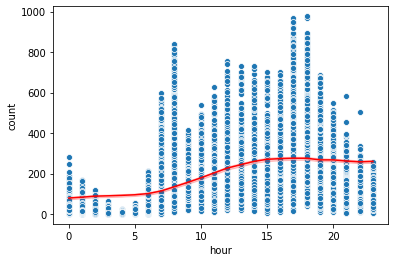

In [170]:
# Plot the training data and the predictions for the training data
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=X_train_fe['hour'], y=y_train)
sns.lineplot(x=X_train_fe['hour'], y=y_pred_train, c='r')

In [171]:
X_test_fe = feature_engineer(X_test)


m.score(X_test_fe, y_test)

0.3297130221874832

/Users/lara/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:823: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/Users/lara/anaconda3/lib/python3.7/site-packages/seaborn/relational.py:834: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


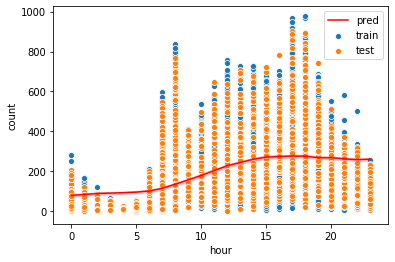

In [172]:
# Plot the training data and the predictions for the training data
sns.scatterplot(x=X_train['hour'], y=y_train, label='train')
sns.scatterplot(x=X_test['hour'], y=y_test, label='test')
sns.lineplot(x=X_train['hour'], y=y_pred_train, c='r', label='pred')
plt.legend()